In [1]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)
timeSeries

,class,file_path,exam,cop_x,cop_y,flag,acc_x,acc_y,rms_acc_x,rms_acc_y,...,samp_en_x,samp_en_y,f80_x,f80_y,mf_lf_x,mf_lf_y,mf_mf_x,mf_mf_y,mf_hf_x,mf_hf_y
0,Healthy,../data/raw/COP_Tests/HG\participant_21\OASETD...,OASETD,"[-0.5907142773, -0.5830138725, -0.568375171700...","[0.2712757557, 0.2322967262, 0.2001411492, 0.1...",real,"[0.0, 0.19251012180000002, 0.3659675177, 0.641...","[0.0, -0.9744757362, -0.8038894263, -0.5128178...",0.275944,1.017366,...,0.022634,0.130354,193.615346,453.199431,11.402748,26.146214,3.098147,9.071309,0.876182,0.822447
1,Healthy,../data/raw/COP_Tests/HG\participant_21\OASE_S...,OASE,"[-0.1216296082, -0.1255443063, -0.1220796319, ...","[0.2382965813, 0.1902104963, 0.1435632476, 0.0...",real,"[0.0, -0.0978674528, 0.08661685820000001, 0.09...","[0.0, -1.2021521243, -1.1661812174, -1.1642681...",0.348282,1.094997,...,0.031071,0.124366,154.466090,424.615996,10.249035,20.396859,2.652427,9.220760,0.275486,1.254465
2,Healthy,../data/raw/COP_Tests/HG\participant_21\OASITD...,OASITD,"[-0.1673141316, -0.1617796703, -0.1517826153, ...","[0.8381318585, 0.9215735610000001, 1.008309293...",real,"[0.0, 0.1383615326, 0.2499263746, 0.5865120819...","[0.0, 2.0860425636, 2.1683932987, 2.1825133877...",0.584157,1.367482,...,0.052403,0.181430,221.181984,792.630826,12.012784,50.680674,4.606157,12.561370,0.454124,2.678517
3,Healthy,../data/raw/COP_Tests/HG\participant_21\OCSETD...,OCSETD,"[-0.0249518425, -0.0183494472, -0.0160548979, ...","[0.5626136740000001, 0.5075073804, 0.464026374...",real,"[0.0, 0.1650598826, 0.0573637322, -0.007285961...","[0.0, -1.3776573393, -1.0870251509, -1.0105456...",0.330530,1.242923,...,0.014981,0.166926,119.803139,487.840236,6.199874,26.488442,2.494176,9.817008,0.323247,1.260141
4,Healthy,../data/raw/COP_Tests/HG\participant_21\OCSE_S...,OCSE,"[0.030813172200000002, 0.03789838, 0.046175301...","[0.132542597, 0.1070391026, 0.094200087, 0.070...",real,"[0.0, 0.17713019430000002, 0.2069230273, -0.00...","[0.0, -0.6375873588000001, -0.3209753906, -0.5...",0.408705,1.535297,...,0.031260,0.215147,169.824356,673.075707,11.367458,38.918436,2.797528,13.425002,0.367001,1.235255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Neuropathic,../data/raw/COP_Tests/DNG\participant_20\EBOCT...,EBOCTD,"[0.2687409623, 0.2971290968, 0.3297786387, 0.3...","[-0.09398484160000001, -0.0063951703, 0.060608...",real,"[0.0, 0.7097033624, 0.8162385478, 0.8238852104...","[0.0, 2.1897417831, 1.6750820972, 0.92611032, ...",0.870562,1.678451,...,0.109461,0.207895,446.323302,702.654730,41.990345,36.403881,4.186282,15.464272,0.310305,1.258786
429,Neuropathic,../data/raw/COP_Tests/DNG\participant_20\EBOCT...,EBOCTD,"[0.2259137309, 0.1908193783, 0.1630518829, 0.1...","[-0.009166554, -0.053337505300000004, -0.08610...",real,"[0.0, -0.8773588148, -0.6941873860000001, -0.7...","[0.0, -1.1042737843000001, -0.8191289505, -0.7...",0.816791,1.736424,...,0.098327,0.243884,500.814891,705.528652,45.340831,39.616737,5.003792,14.675227,0.562414,1.137166
430,Neuropathic,../data/raw/COP_Tests/DNG\participant_20\EBOCT...,EBOCTDSI,"[-0.8156239057, -0.7569614031, -0.7370641592, ...","[-0.3674578166, -0.44968110050000004, -0.52421...",real,"[0.0, 1.4665625635000001, 0.49743109830000004,...","[0.0, -2.055582097, -1.8632227023999999, -1.24...",2.072932,2.248739,...,0.207265,0.304981,1055.730600,995.563479,67.426475,65.435659,18.742228,17.299386,2.078291,1.777904
431,Neuropathic,../data/raw/COP_Tests/DNG\participant_20\EBOCT...,EBOCTDSI,"[1.0270392663, 0.7484775808, 0.4462072318, 0.1...","[0.1475991472, 0.2132451621, 0.2114177318, 0.1...",real,"[0.0, -6.9640421373, -7.556758724, -7.45788597...","[0.0, 1.6411503733, -0.0456857565, -1.16360110...",1.803191,2.329126,...,0.242169,0.275100,765.280869,868.766104,40.297005,45.197907,14.358763,19.209475,3.071704,1.442357


In [2]:
import numpy as np

def shuffle_time_slices(time_series, slice_size):
    """
    Shuffle different time slices of the provided array.

    Parameters:
    time_series (array-like): An array containing time-series data.
    slice_size (int): The size of each time slice that will be shuffled.

    Returns:
    shuffled_data (array-like): The array with shuffled time slices.
    """

    # Convert to numpy array if not already
    time_series = np.array(time_series)

    if slice_size <= 0 or slice_size > len(time_series):
        raise ValueError("Slice size must be within the range 1 to len(data)")

    num_slices = len(time_series) // slice_size

    # Cut the data into slices
    slices = [time_series[i * slice_size:(i + 1) * slice_size] for i in range(num_slices)]

    # Shuffle the slices
    np.random.shuffle(slices)

    # Concatenate the shuffled slices
    shuffled_data = np.concatenate(slices)

    # Include any leftover data that couldn't form a complete slice
    remainder = len(time_series) % slice_size
    if remainder > 0:
        remainder_data = time_series[-remainder:]
        shuffled_data = np.concatenate([shuffled_data, remainder_data])

    return shuffled_data


In [3]:
import numpy as np

def augment_time_series(time_series_set, num_samples, slice_size):
    """
    Augment time series data by applying random shuffling using the shuffle_time_slices function.

    Parameters:
    time_series_set (array-like): Set of time series data.
    num_samples (int): Number of artificial samples to generate.
    slice_size (int): The size of each time slice that will be shuffled.

    Returns:
    augmented_data (array-like): Augmented time series data.
    """


    # Create an empty array to store augmented data
    augmented_data = []

    # Apply random shuffling to generate augmented samples
    for i in range(num_samples):
        # Shuffle the time slices
        shuffled_slices = shuffle_time_slices(time_series_set[i], slice_size=slice_size)
        # Store the shuffled time slices as an augmented sample
        augmented_data.append(shuffled_slices)  # You can use other aggregation functions as well

    return augmented_data


In [4]:
data = timeSeries[timeSeries['class'] == 'Diabetic'].cop_x.values

# Convertir las listas de series de tiempo en arrays numpy
data = np.array([np.array(series) for series in data])

kappa = augment_time_series(data, num_samples=len(data), slice_size=100)

In [5]:
kappa

[array([-0.30062607, -0.29367476, -0.28619507, -0.28047966, -0.27509704,
        -0.27295356, -0.27709876, -0.28332802, -0.29436401, -0.300665  ,
        -0.30460607, -0.30625024, -0.30073241, -0.29399868, -0.28506034,
        -0.27827417, -0.27161451, -0.25272502, -0.23555341, -0.22094101,
        -0.21151162, -0.1992896 , -0.18862183, -0.18546308, -0.18318929,
        -0.18249625, -0.17481299, -0.17316405, -0.17198182, -0.16500844,
        -0.16193449, -0.16345403, -0.16360721, -0.1697005 , -0.174841  ,
        -0.18259785, -0.18709839, -0.19043913, -0.19269703, -0.19974566,
        -0.20834014, -0.21626359, -0.22366784, -0.232716  , -0.23859786,
        -0.2465459 , -0.2489586 , -0.25298335, -0.25873492, -0.2622476 ,
        -0.26144915, -0.25914148, -0.25130562, -0.24592124, -0.23154292,
        -0.21952223, -0.208722  , -0.20678448, -0.20787287, -0.21297352,
        -0.22551402, -0.24387161, -0.26304684, -0.27914371, -0.28531861,
        -0.2916467 , -0.29427935, -0.29607977, -0.2

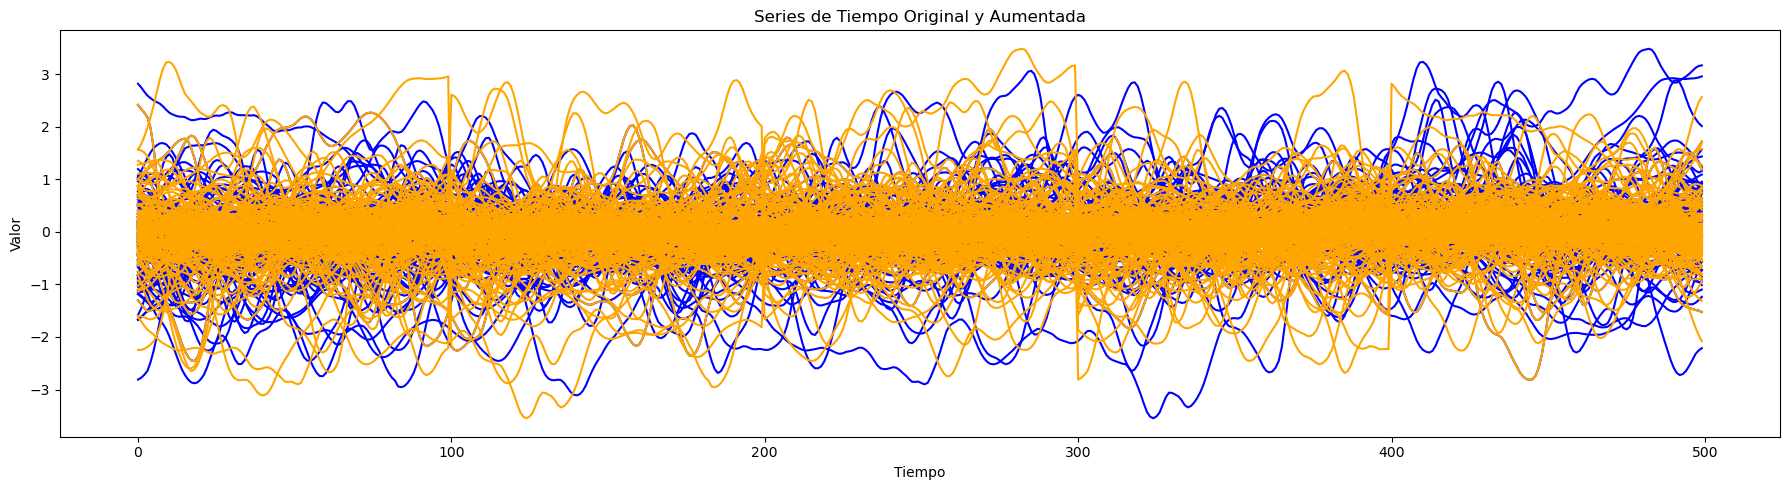

In [6]:
import sys
sys.path.insert(0, "..")

from src.visualization.visualize import plot_series

# Graficamos todas las series de tiempo
plot_series(data, kappa)